## Code for analyzing photometry data from NE and DA animals. 
Uses .pkl data from photometry and behavioral data from .parquet file. 

Load the functions from photometry_analysis.py file. Creates full dataframe which can be used in downstream functions. Use clear_memory to clear Session_cache

In [12]:
%load_ext autoreload
%autoreload 2
from photometry_analysis import *
full_df = pd.read_parquet(PARQUET_PATH, engine="pyarrow")
full_df['date'] = full_df['date'].astype(str)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
clear_memory()

Analyse photometry signal for a specified subjid ("JOA-M-0022") and sessid ("20250203"). Option to show heatmap of all trials and to split by win/loss

In [ ]:
# Analyze a specific subject and session
session_result = analyze_specific_session("JOA-M-0022", "20250212", show_heatmap=False, win_loss=False)

Similar to analyze_specific_session, but pooled visualization for all sessions of an animal. Use subjid and option for win/loss split. 

In [ ]:
# Analyze all sessions for a specific subject and create pooled visualization
subject_pooled_result = pooled_results("JOA-M-0020", win_loss=True)
#22, 23, 24, 25, 26; 20

Loaded saved results for JOA-M-0022/20250131
Loaded saved results for JOA-M-0022/20250201
Skipping JOA-M-0022/20250201, less than 100 valid trials (71).
Loaded saved results for JOA-M-0022/20250203
Loaded saved results for JOA-M-0022/20250204
Loaded saved results for JOA-M-0022/20250206
Loaded saved results for JOA-M-0022/20250207
Loaded saved results for JOA-M-0022/20250208
Loaded saved results for JOA-M-0022/20250210
Loaded saved results for JOA-M-0022/20250212
Loaded saved results for JOA-M-0022/20250214
Loaded saved results for JOA-M-0022/20250215
Loaded saved results for JOA-M-0022/20250217
Loaded saved results for JOA-M-0022/20250218
Loaded saved results for JOA-M-0022/20250220
Loaded saved results for JOA-M-0022/20250224
Loaded saved results for JOA-M-0022/20250226
Loaded saved results for JOA-M-0022/20250228
Loaded saved results for JOA-M-0022/20250303
Saved figure for JOA-M-0022/all_sessions to Z:\delab\lab-members\joschua\photometry_analysis\JOA-M-0022\all_sessions\average_si

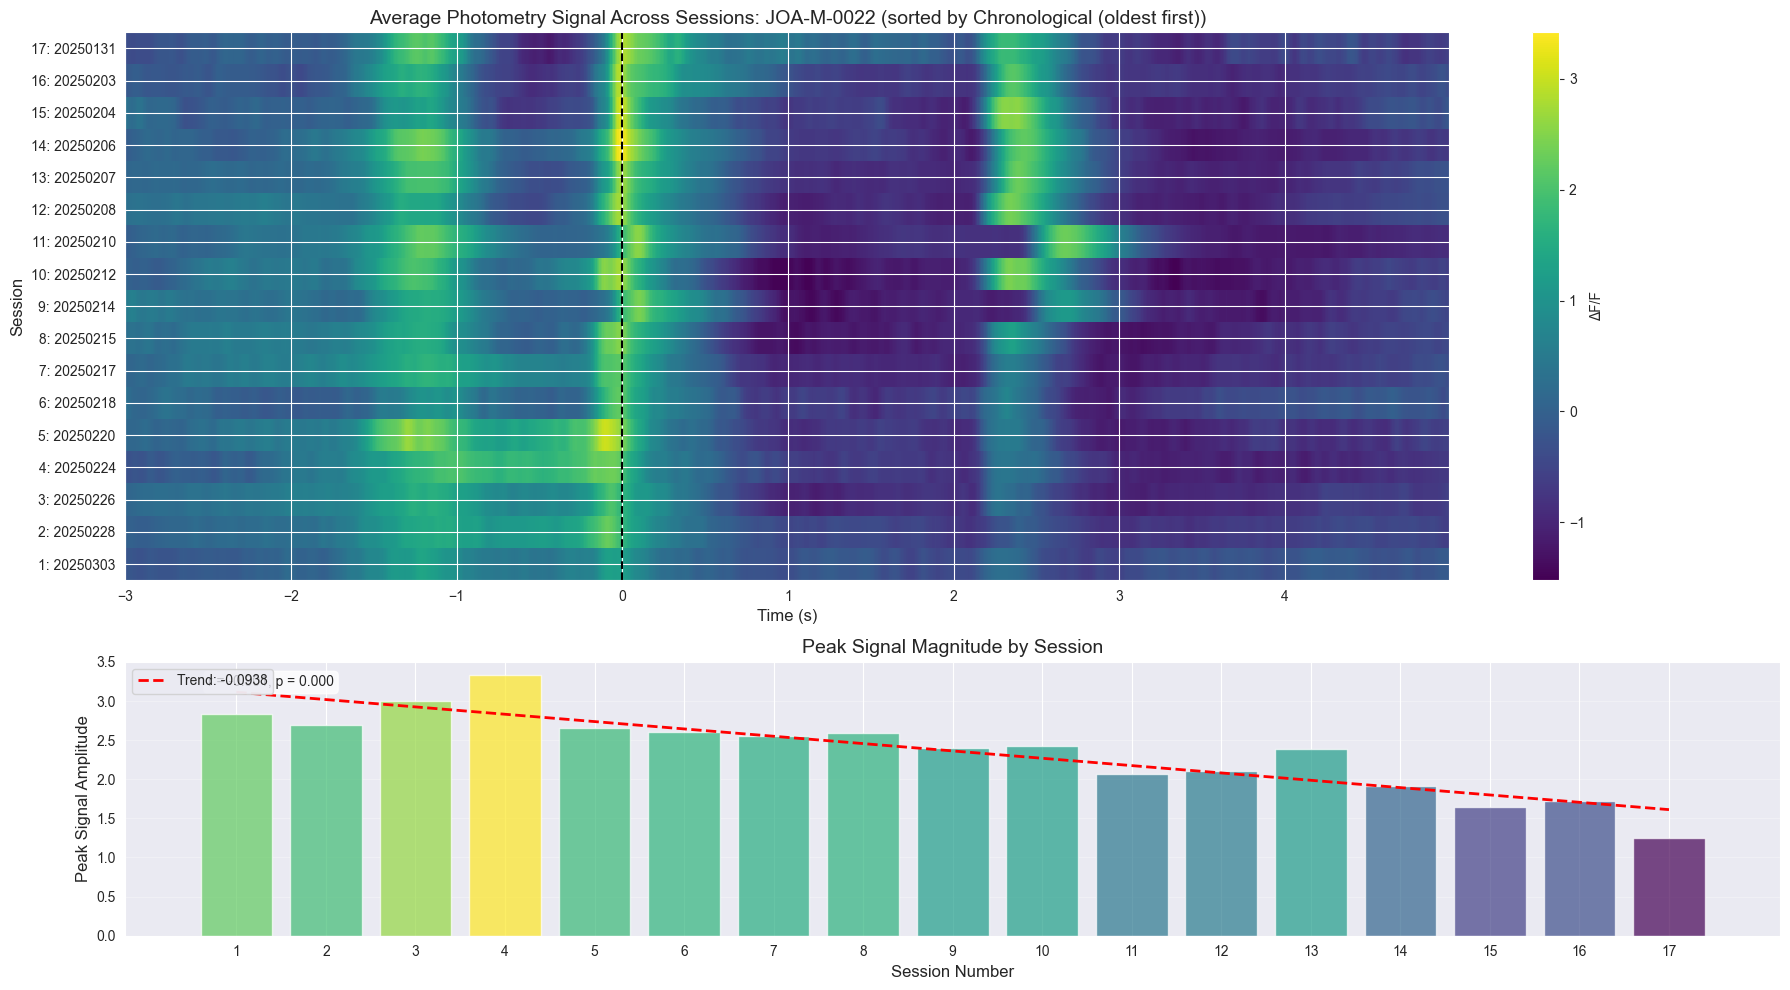

{'subject_id': 'JOA-M-0022',
 'session_dates': ['20250131',
  '20250203',
  '20250204',
  '20250206',
  '20250207',
  '20250208',
  '20250210',
  '20250212',
  '20250214',
  '20250215',
  '20250217',
  '20250218',
  '20250220',
  '20250224',
  '20250226',
  '20250228',
  '20250303'],
 'time_axis': array([-3.        , -2.99166667, -2.98333333, -2.975     , -2.96666667,
        -2.95833333, -2.95      , -2.94166667, -2.93333333, -2.925     ,
        -2.91666667, -2.90833333, -2.9       , -2.89166667, -2.88333333,
        -2.875     , -2.86666667, -2.85833333, -2.85      , -2.84166667,
        -2.83333333, -2.825     , -2.81666667, -2.80833333, -2.8       ,
        -2.79166667, -2.78333333, -2.775     , -2.76666667, -2.75833333,
        -2.75      , -2.74166667, -2.73333333, -2.725     , -2.71666667,
        -2.70833333, -2.7       , -2.69166667, -2.68333333, -2.675     ,
        -2.66666667, -2.65833333, -2.65      , -2.64166667, -2.63333333,
        -2.625     , -2.61666667, -2.60833333

In [2]:
analyze_session_average_heatmap("JOA-M-0022", comp_conf=False)

Run to analyze all subjects and their respective sessions. Creates plots for individual sessions and pooled results for all subjects. 

In [ ]:
# Process all subjects and sessions
results, subject_list = all_results(win_loss=True)

Tool to select any subject and an individual session or pooled results. Option for win/loss split and heatmap (individual sessions only)

In [ ]:
select_and_visualize(show_heatmap=True, win_loss=True)

Calculates smoothed reward rate using moving window for each session for the selected animal. Then, all trials are divided into quartiles based on their smoothed reward rate, and average photometry signal of each quartile is plotted. Option for win/loss split

In [ ]:
analyze_reward_rate_quartiles("JOA-M-0020", win_loss=True)
#change window size to 20, then chuck 10 trials 

Similar to reward_rate_quartiles, but smoothed computer confidence is calculated for each session/trial. 

In [ ]:
analyze_comp_confidence_quartiles("JOA-M-0020", win_loss=False)

Calculates the absolute difference between win and loss signal for each session and plots it with an ascending blue gradient. Sorted either by date or average computer confidence of the session. Option to turn of SEM for easier visualization. 

In [ ]:
analyze_session_win_loss_difference_gap("JOA-M-0020", comp_conf=False, sem=False, df=full_df) 
#Visualize the difference between the win and loss signal at each point. Option to have it sorted by day or by average computer confidence of each session. Option to deactivate SEM for clearer visualization. Option to use global DF to reduce memory use

Similar calculation of difference between win and loss signal per session. Creates heatmap of the difference between win and loss signal across the epoch for all sessions. Red = win > loss, blue = win < loss 

Loaded parquet data for confidence calculations
Loaded saved results for JOA-M-0020/20250303
Session 20250303 average confidence: 5.7369
Loaded saved results for JOA-M-0020/20250305
Session 20250305 average confidence: 3.2241

Sessions ranked by computer confidence (highest to lowest):
1. Session 20250303: 5.7369
2. Session 20250305: 3.2241
Saved figure for JOA-M-0020/all_sessions to Z:\delab\lab-members\joschua\photometry_analysis\JOA-M-0020\all_sessions\win_loss_difference_heatmap_by_comp_conf.png


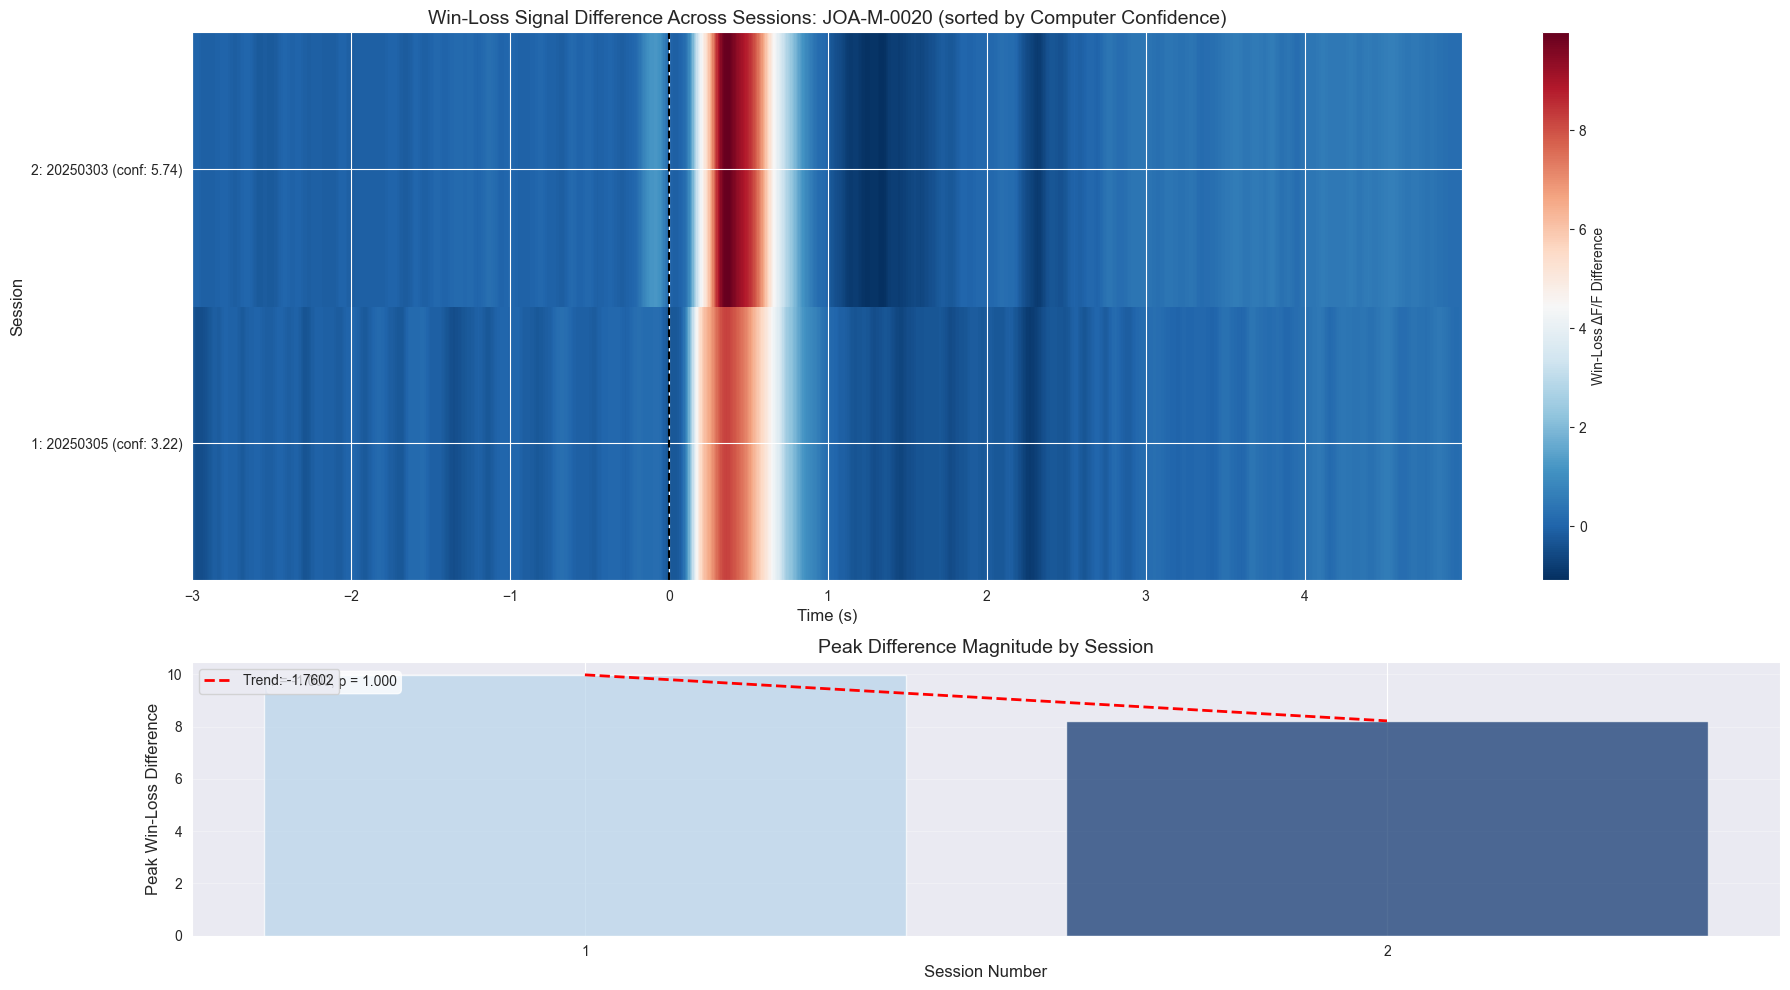

{'subject_id': 'JOA-M-0020',
 'session_dates': ['20250303', '20250305'],
 'time_axis': array([-3.        , -2.99166667, -2.98333333, -2.975     , -2.96666667,
        -2.95833333, -2.95      , -2.94166667, -2.93333333, -2.925     ,
        -2.91666667, -2.90833333, -2.9       , -2.89166667, -2.88333333,
        -2.875     , -2.86666667, -2.85833333, -2.85      , -2.84166667,
        -2.83333333, -2.825     , -2.81666667, -2.80833333, -2.8       ,
        -2.79166667, -2.78333333, -2.775     , -2.76666667, -2.75833333,
        -2.75      , -2.74166667, -2.73333333, -2.725     , -2.71666667,
        -2.70833333, -2.7       , -2.69166667, -2.68333333, -2.675     ,
        -2.66666667, -2.65833333, -2.65      , -2.64166667, -2.63333333,
        -2.625     , -2.61666667, -2.60833333, -2.6       , -2.59166667,
        -2.58333333, -2.575     , -2.56666667, -2.55833333, -2.55      ,
        -2.54166667, -2.53333333, -2.525     , -2.51666667, -2.50833333,
        -2.5       , -2.49166667, -2.4

In [4]:
analyze_session_win_loss_difference_heatmap("JOA-M-0020", comp_conf=True)

Plot with subplots for each session. Photometry data splot into win/loss with corresponding choice history plots underneath. 

In [ ]:
plot_per_session_win_loss("JOA-M-0020")

Divides all trials T0 into win and loss trials. Then, subdivision based on T-1, into win-->win, win-->loss, loss-->win, loss-->loss. Plots average photometry signal for T0 (effect of preceding win or loss) 

In [ ]:
analyze_previous_outcome_effect("JOA-M-0020")

Calculates and plots the % of trials that follow WSLS behavior. 50% expected for random choices

In [ ]:
analyze_win_stay_lose_switch("JOA-M-0020", df=full_df)

Looks at last loss trials (T0 loss where T+1 is win). Then, divides these trials based on the number of losses in a row, either 1, 2, 3, 4, or >=5. Plots average photometry data for each category. Option to skipped missed trials and to only display 1 and 5+ loss categories

In [ ]:
analyze_loss_streaks_before_win("JOA-M-0026", skipped_missed=True, only_1_5=True)

Takes all loss trials, and rearranges them based on the average photometry signal for different time windows. Then, creates quartiles based on rearranges trials.
Time windows: pre_cue (-0.75 to -0.25s), early_post (1-2s), late_post (3-5s). 
Calculates % of loss trials in each quartile that are followed by a switch in choice (L/R). 
Option to turn on/off plot_verification showing time window and sorted trials. 

In [31]:
analyze_loss_trials_signal_quartiles("JOA-M-0026", signal_window='late_post', plot_verification=False)
#see % of loss trials followed by switch in choice, for quartiles sorted based on photometry signal in different time windows. Windows: pre_cue (-0.75 to -0.25), early_post (1-2s), late_post (3.5-4.5s)

Processing JOA-M-0026/20250131...
Loaded saved results for JOA-M-0026/20250131
Processing JOA-M-0026/20250201...
Loaded saved results for JOA-M-0026/20250201
Processing JOA-M-0026/20250203...
Loaded saved results for JOA-M-0026/20250203
Processing JOA-M-0026/20250205...
Loaded saved results for JOA-M-0026/20250205
Processing JOA-M-0026/20250206...
Loaded saved results for JOA-M-0026/20250206
Processing JOA-M-0026/20250207...
Loaded saved results for JOA-M-0026/20250207
Processing JOA-M-0026/20250210...
Loaded saved results for JOA-M-0026/20250210
Processing JOA-M-0026/20250211...
Loaded saved results for JOA-M-0026/20250211
Processing JOA-M-0026/20250212...
Loaded saved results for JOA-M-0026/20250212
Processing JOA-M-0026/20250215...
Loaded saved results for JOA-M-0026/20250215
Processing JOA-M-0026/20250217...
Loaded saved results for JOA-M-0026/20250217

=== Analysis of late_post Signal Quartiles: JOA-M-0026 ===
Time window: (3.5s to 4.5s)
Total trials analyzed: 2955

Choice Switch 

{'subject_id': 'JOA-M-0026',
 'time_axis': array([-3.        , -2.99166667, -2.98333333, -2.975     , -2.96666667,
        -2.95833333, -2.95      , -2.94166667, -2.93333333, -2.925     ,
        -2.91666667, -2.90833333, -2.9       , -2.89166667, -2.88333333,
        -2.875     , -2.86666667, -2.85833333, -2.85      , -2.84166667,
        -2.83333333, -2.825     , -2.81666667, -2.80833333, -2.8       ,
        -2.79166667, -2.78333333, -2.775     , -2.76666667, -2.75833333,
        -2.75      , -2.74166667, -2.73333333, -2.725     , -2.71666667,
        -2.70833333, -2.7       , -2.69166667, -2.68333333, -2.675     ,
        -2.66666667, -2.65833333, -2.65      , -2.64166667, -2.63333333,
        -2.625     , -2.61666667, -2.60833333, -2.6       , -2.59166667,
        -2.58333333, -2.575     , -2.56666667, -2.55833333, -2.55      ,
        -2.54166667, -2.53333333, -2.525     , -2.51666667, -2.50833333,
        -2.5       , -2.49166667, -2.48333333, -2.475     , -2.46666667,
        -